In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, Output, FloatSlider, Checkbox, IntSlider, HBox, VBox, Button

from matplotlib.patches import FancyArrowPatch

from numpy import cos,sin,pi, sqrt, exp, linspace, arange,dot,arccos, cross, array 
from numpy.linalg import norm # this is the magnitude function
from mpl_toolkits.mplot3d import axes3d
# from itertools import combinations

%matplotlib widget

# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    "figure.figsize": (6, 6),
    "text.usetex": True,
    "font.family": "serif",
})

In [2]:
%%html
<style>
tr {
    font-size: 1.5em;
}
    li.thm {
        margin: 10px 0;
    }
    .shadow {
        /*Edit or add new attributes, change size, color, etc */
        width: 75%;
        box-shadow: 8px 8px 10px #444;
        border: 1px solid silver;

        /*For positioning in a jupyter notebook*/
        margin-top: 2em;
        position: relative;
        top: -25px
    }

    ol li {
        padding: .5em;
    }
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| magnitude    | $|\vec v|$ | $$\sqrt{\sum v_i^2}$$ | scalar |
| scalar multiplication | $c \vec v$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $\vec v + \vec w$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |
| dot product | $\vec v \cdot \vec w$ | $$v_1 w_1 + \cdots + v_n w_n  $$| scalar |

<p style="padding-bottom:40%;"> </p>

## Projection

Suppose $\vec b \neq \vec 0$.

The **vector projection** of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{proj}_\vec b \vec a = \frac{\vec a \cdot \vec b}{\vec b \cdot \vec b} \vec b. $$

In [3]:
IFrame(src="https://embed.polleverywhere.com/multiple_choice_polls/jW1baBpvTHzhR54weEzSv?controls=none&short_poll=true", width=800, height=600)

<p style="padding-bottom:40%;"> </p>

# Lecture 03 - Cross Product, Lines, Planes

**Objectives:**

  - Cross Product
    - Formula
    - Properties
    - Application to volume
  - Lines and Planes
    - Parametric v. equation form
    - Find the [line/plane] that...

<p style="padding-bottom:40%;"> </p>

## Cross Product

It turns out $\RR^3$ is special. There happens to be a vector 'multiplication' of two vectors $$\vec v \times \vec w$$ that gives a new vector. This **does not work** in $\RR^2$ (and most other dimensions).

<p style="padding-bottom:40%;"> </p>

The following properties actually define the cross product.

  - $\vec v \times \vec w$ is bilinear. 

  - $\vec v \times \vec w  = - \vec w \times \vec v $ (antisymmetry)

  - $\vec i \times \vec j = \vec k$
  - $\vec j \times \vec k = \vec i$
  - $\vec k \times \vec i = \vec j$
  

<p style="padding-bottom:40%;"> </p>

## Formula

$$ \langle a,b,c \rangle\times \langle d,e,f \rangle = (a\vec i + b\vec j + c \vec k)\times(d\vec i + e\vec j + f \vec k)$$

$$ = \begin{vmatrix} \vec i & \vec j & \vec k \\a &b &c \\ d & e & f \\ \end{vmatrix} $$

$$ = (bf-ce)\,\vec i + (cd-af)\, \vec j + (ae - bd)\, \vec k  $$

In [4]:
v, w = array(((-1, 1, 2), (1, 2, -1)))

u = cross(v, w)
print(u)

[-5  1 -3]


In [5]:
dot(u, v + w*3)

np.int64(0)

<p style="padding-bottom:40%;"> </p>

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

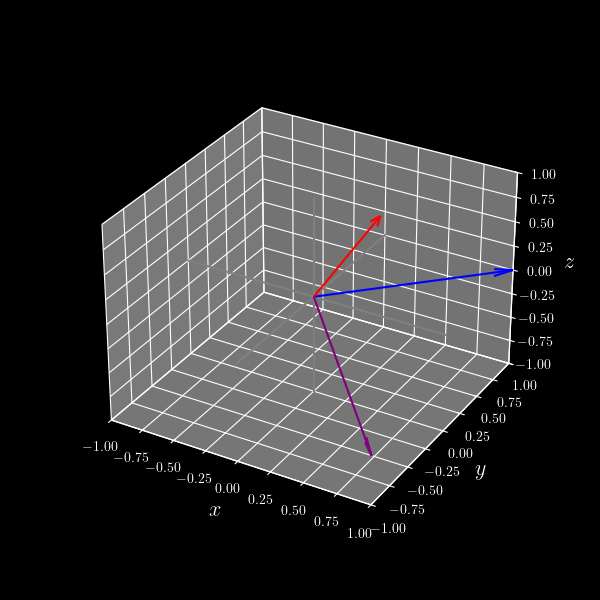

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    t = 1/2
    
    v= np.array((1,1,0))
    w =np.array((1-t,-1/2 + t,1))
    u = np.cross(v,w)
    for c in 'xyz':
        getattr(ax,f"set_{c}label")(f"${c}$",fontsize=16)
        getattr(ax,f"set_{c}lim")([-1,1])
    origin = [0,0,0]
    X, Y, Z = zip(origin,origin,origin) 
    U, V, W = zip(v,w,u)
    ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.1,colors=['b','r','purple'])
    
    return fig.canvas

a("A cross product")



### Example

  1. Find a unit vector perpendicular to $\langle 1,2,-1\rangle$ and $\langle 3,0,1\rangle$. Is there only one?

<p style="padding-bottom:40%;"> </p>

## Volumes

The volume of a parallelopiped defined by vectors $\vec u$, $\vec v$, and $\vec w$ as 3 sides is given by $$V = |\vec u\cdot(\vec v \times \vec w)|.$$ The inner expression is called the **triple product** of the three vectors.

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()

    slider = FloatSlider(min=0, max = 3.5, value=2)

    c =slider.value
    
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])
    
    ax.arrow(0,0,4,1,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a1 = ax.arrow(0,0,c,2*c,color='b',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a2 = ax.arrow(c,2*c,4,1,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a3 = ax.arrow(4,1,c,2*c,color='b',width=.02,head_width=.1,lw=2,length_includes_head=True)
    f1 = ax.fill([0,4,4+c,c],[0,1,2*c + 1,2*c],alpha=.5,zorder=-1)[0]
    p1 = ax.plot([c,c*3/8*4,0],[2*c,c*3/8,0],'--')[0]

    t1 = ax.text(c*5/4,c*19/16,"h",size=18)
    
    def update(change):
        c = slider.value
        t1.set_x(c*5/4)
        t1.set_y(c*19/16)
        
        a1.set_data(dx=c, dy=2*c)
        a2.set_data(x=c, y=2*c)
        a3.set_data(dx=c, dy=2*c)
        
        f1.set_xy(np.array([[0,4,4+c,c],[0,1,2*c + 1,2*c]]).transpose())
        p1.set_data([c,c*3/8*4,0],[2*c,c*3/8,0])
        
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Areas")


<p style="padding-bottom:40%;"> </p>

## Lines

In $\RR^2$, two distinct points determine a line. The same is true in higher dimensions. 

Similarly, a slope (a scalar) and a point is sufficient in $\RR^2$, but in higher dimension the "direction" of a line needs more than a scalar to be specified. It can be done with a **direction vector**.

<p style="padding-bottom:40%;"> </p>

### Parametric form

The [parametric form](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=vector&obj0_params_a=1&obj0_params_b=1&obj0_params_c=.5&obj0_params_x=0&obj0_params_y=0&obj0_params_z=0&obj0_params_show=true&obj1_kind=vector&obj1_params_a=0.2&obj1_params_b=-0.3&obj1_params_c=0&obj1_params_x=1&obj1_params_y=1&obj1_params_z=.5&obj1_params_show=true&obj2_kind=curve&obj2_params_a=-2&obj2_params_b=5&obj2_params_x=.2+t+%2B+1&obj2_params_y=1+-+.3+t&obj2_params_z=0+%2B+.5&obj2_params_tau=0.5586511428571324) for a line through a position $\vec p$ with direction vector $\vec v$ it geven by $$\vec r(t) = \vec p + t \vec v.$$

In [17]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    slider = FloatSlider(value=0, min=-1, max=5, step=.01, orientation='vertical')

    ax.plot([1+2*(-1),1+2*(5)],[1,1],[1-2*(-1),1-2*5],color='k',ls='dashed')
    ax.plot([-1,5],[0,0],[0,0],color='k',lw=.5)
    ax.plot([0,0],[-2,4],[0,0],color='k',lw=.5)
    ax.plot([0,0],[0,0],[-2,4],color='k',lw=.5)

    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    # ax.view_init(30, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
        
    def update(change):
        t = slider.value
        for c in ax.collections:
            c.remove()
        ax.quiver([0,0, 1],[0,0, 1],[0,0, 1],[1,2*t+1, 2*t],[1,1, 0],[1, 1-t*2,-t*2])
        # ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
    
    update({})
    slider.observe(update, names='value')
    
    return HBox([slider, fig.canvas])

a("Parametrized Line")

### Quick exercise

Write a parametric form for a line through position vectors $\vec p$ and $\vec q$.

<p style="padding-bottom:40%;"> </p>

### Alternate form

Sometimes lines in $\RR^3$ are written as 3 equations:

\begin{align*}
x &= v_1 t + p_1 \\
y &= v_2 t + p_2 \\
z &= v_3 t + p_3
\end{align*}

If we solve for the common parameter $t$, we get the **symmetric equations**:
$$ \frac{x - p_1}{v_1} = \frac{y - p_2}{v_2} = \frac{z - p_3}{v_3}$$

<p style="padding-bottom:40%;"> </p>

## Exercises

  1. Where does the [line through $(2,4,-2)$ and $(3,1,-1)$](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=true&obj0_kind=vector&obj0_params_a=2&obj0_params_b=4&obj0_params_c=-2&obj0_params_x=0&obj0_params_y=0&obj0_params_z=0&obj0_params_show=true&obj0_params_color=%230082a7&obj1_kind=vector&obj1_params_a=3&obj1_params_b=1&obj1_params_c=-1&obj1_params_x=0&obj1_params_y=0&obj1_params_z=0&obj1_params_show=true&obj1_params_color=%23a79500) cross the $xy$-plane?

In [9]:
v, w = array(((2, 4, -2), (3, 1, -1)))
print(v - w)

[-1  3 -1]


<p style="padding-bottom:40%;"> </p>

  2. Is the line $(2,4,0)$ and $(1,1,1)$ perpendicular to the line through $(3,3,4)$ and $(3,-1,-8)$?

<p style="padding-bottom:40%;"> </p>

# Planes

By analogy, we could parametrize planes in a similar way, but need 2 parameters.

$$\vec r(s,t) = \vec p + t\vec v + s \vec w$$

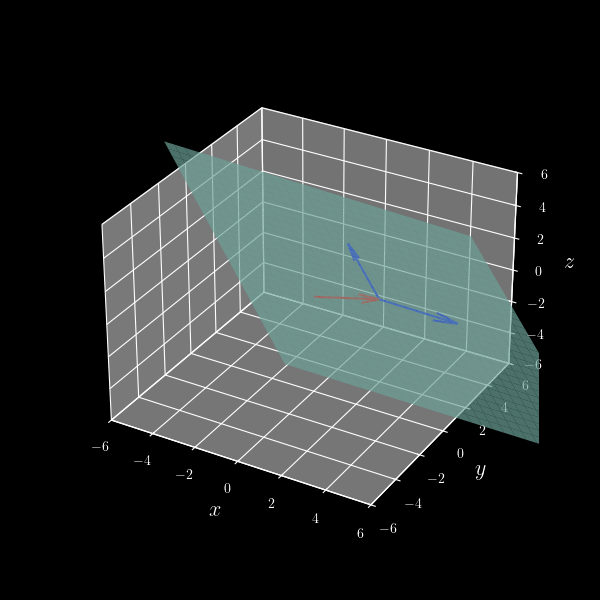

In [10]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.7)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],[3,0,1],[-2,1,2],[3,1,-1]])
    ax.quiver(r[:3],v[:3],w[:3],r[3:],v[3:],w[3:],color=['r','b','b']);
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
        
    
    return fig.canvas

a("Parametrized Plane")

<p style="padding-bottom:40%;"> </p>

## Equation of a plane

But a more efficient way in $\RR^3$ recognizes that a plane can be define by 
  - a position vector $\vec p = \langle p_1,p_2,p_3 \rangle$, and
  - a **normal** vector $\vec n = \langle a,b,c \rangle$, perpendicular to the plane.
  
So a position vector $\vec x = \langle x,y,z \rangle$ is on the plane if and only if $$\vec n\cdot(\vec x - \vec p) = 0 $$

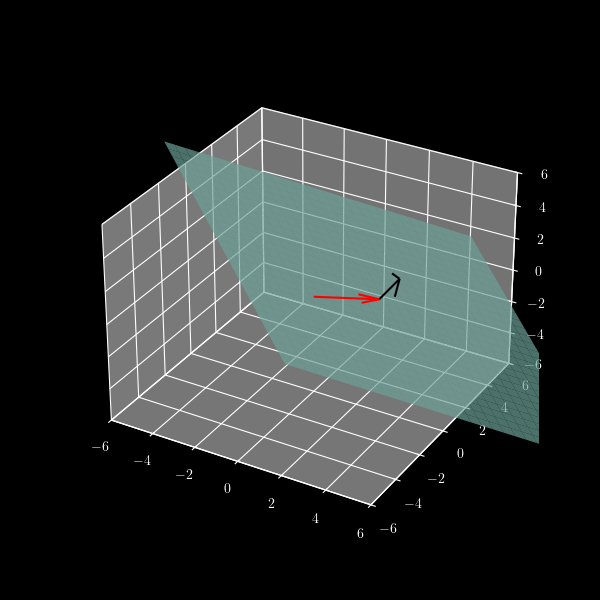

In [11]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    n = -np.cross([-2,1,2],[3,1,-1])

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.7)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],n])
    ax.quiver(r[:2],v[:2],w[:2],r[2:],v[2:],w[2:],color=['r','k']);
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);  
        
    
    return fig.canvas

a("Plane Equation")

## Equation of a plane

In coordinates, this becomes $$a(x-p_1) + b (y-p_2) + c (z-p_3) = 0$$ or, alternatively, $$ax+by+cz = d$$ where $d=\vec n \cdot\vec p$.


<p style="padding-bottom:40%;"> </p>

#### Quick exercise

What is a normal vector to the plane given by $$ x+2y = 16-8z?$$
Find a point on this plane. 

<p style="padding-bottom:40%;"> </p>

### Exercises

  1. Find an equation of the plane through $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.

  2. Find a parametric form for the line of intersection of the [planes](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=level&obj0_params_g=x+%2B+y+-+z&obj0_params_k=2&obj0_params_a=-4&obj0_params_b=4&obj0_params_c=-4&obj0_params_d=4&obj0_params_e=-4&obj0_params_f=4&obj1_kind=level&obj1_params_g=2*x+-+y+%2B+3*z&obj1_params_k=1&obj1_params_a=-4&obj1_params_b=4&obj1_params_c=-4&obj1_params_d=4&obj1_params_e=-4&obj1_params_f=4) given by $x+y-z = 2$ and $2x - y + 3z = 1$.

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

# Distance between points, lines, and planes

The distance between points is given easily by the distance formula, but often one wants to know the distance from a position to a given set of points, or between two sets. First, we must specify by "distance to a set" we mean **the minimum of the distances to all points is the set**.

#### Example

Find the distance from the origin to the line given by 
$$\vec r(t) = (3-t)\,\vec i + 2t\,\vec j + (t - 2)\,\vec k.$$

In [16]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    p,v = np.array([[3,0,-2],[-1,2,1]])
    pj = np.dot(p,v)/np.dot(v,v)*v
        
    ax.scatter([0], [0], [0], c='k')

    slider = FloatSlider(value=0, min=-1, max=5, step=.01, orientation='horizontal')

    # slider = FloatSlider(value=0, min==2, max=5, step=.1, orientation='vertical')
    sol = Checkbox(value=False, description="solution")
    
    def update_t(change):
        t = slider.value
        for c in ax.collections:
            c.remove()
        ax.quiver([0,0],[0,0],[0,0],[3,3-1*t],[0,2*t],[-2,-2+t])
        if sol.value:
            ax.quiver(vx[:2],vy[:2],vz[:2],vx[2:],vy[2:],vz[2:],color='r')
        
    slider.observe(update_t, names=['value'])
        
    ax.plot([5,-2],[-4,10],[-4,3],color='k',ls='dashed')

    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    
    vx,vy,vz = np.column_stack([[0,0,0],pj,pj,p-pj])

    update_t({})
    
    sol.observe(update_t, names=['value'])
            
    return VBox([HBox([slider, sol]), fig.canvas])

a("Distance: Point to Line")

<p style="padding-bottom:40%;"> </p>

### Distance from a point to a line

We can generalize this:
The distance from a point at position $\vec x$ to a line with parametric form $\vec r (t) = \vec p + t\,\vec v$ is given by $$|\vec x - \vec p - \operatorname{proj}_\vec v (\vec x - \vec p) |.$$